In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = -100
## ^ for posterity

def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    return u_n*np.exp(c*h) + I

#Now using the rk2 method
def I_RK2(t,h):
    f1 = F(t)
    f2 = F(t+h)

    part1 = f1*(np.exp(c*h)-1)/c

    part2 =(f2-f1)*(np.exp(c*h)-1-h*c)/(h*c**2)

    return  (part1 + part2)
    

In [3]:
T = Total_Time = np.pi/2
N = Number_of_Points = 100
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

In [4]:
print(tvec)

[0.         0.01570796 0.03141593 0.04712389 0.06283185 0.07853982
 0.09424778 0.10995574 0.12566371 0.14137167 0.15707963 0.1727876
 0.18849556 0.20420352 0.21991149 0.23561945 0.25132741 0.26703538
 0.28274334 0.2984513  0.31415927 0.32986723 0.34557519 0.36128316
 0.37699112 0.39269908 0.40840704 0.42411501 0.43982297 0.45553093
 0.4712389  0.48694686 0.50265482 0.51836279 0.53407075 0.54977871
 0.56548668 0.58119464 0.5969026  0.61261057 0.62831853 0.64402649
 0.65973446 0.67544242 0.69115038 0.70685835 0.72256631 0.73827427
 0.75398224 0.7696902  0.78539816 0.80110613 0.81681409 0.83252205
 0.84823002 0.86393798 0.87964594 0.89535391 0.91106187 0.92676983
 0.9424778  0.95818576 0.97389372 0.98960169 1.00530965 1.02101761
 1.03672558 1.05243354 1.0681415  1.08384947 1.09955743 1.11526539
 1.13097336 1.14668132 1.16238928 1.17809725 1.19380521 1.20951317
 1.22522113 1.2409291  1.25663706 1.27234502 1.28805299 1.30376095
 1.31946891 1.33517688 1.35088484 1.3665928  1.38230077 1.39800

In [5]:

def ETDRK2(Total_Time, Number_of_Points, Initial_Condition):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition

    h = T/N ## calculate the step size based on the number of points
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_RK2(tvec[i],h)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [6]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

In [7]:
y,x = ETDRK2(T,N,u_0)

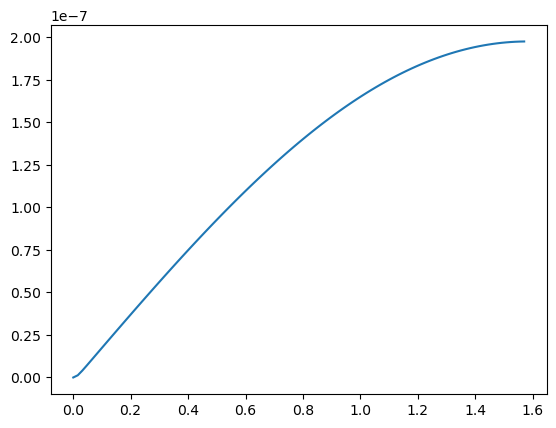

In [8]:
plt.plot(x,np.abs(y - U_true(x,1)))

In [9]:
errorN = 32
## h = np.pi/(2*N)
## N = np.int((1.6)*10**)
Test_N = np.zeros(errorN)


for i in range(0,errorN):
    Test_N[i] = int((np.pi/2)*(10**(1+i/5)))
Test_H  = (np.pi/2)/Test_N

In [10]:
c = -100
h = 1e-7
np.exp(c*h) - 1 - c*h
np.exp(1e-5)

np.float64(1.00001000005)

In [11]:
Error_Vec1 =np.zeros(errorN)
Error_Vec2 = np.zeros(errorN)
#k = np.array([])
for i in range(0, errorN):
    (y1,x) = ETDRK2(T, Test_N[i], u_0)
    #print(x.size)
    yTrue = U_true(x,u_0)
    y_tfinal = yTrue[-1]
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #k = np.append(k,np.abs((y1[-1] - yTrue[-1])/yTrue[-1]))
    Error_Vec1[i] = np.abs((y1[-1] - yTrue[-1])/yTrue[-1])
    Error_Vec2[i] = Test_H[i]**0.5*np.linalg.norm(y1-yTrue)

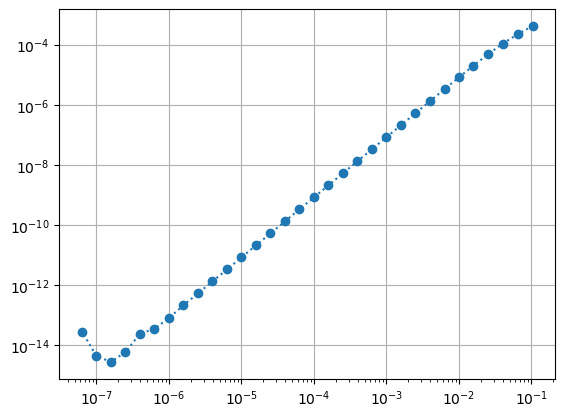

In [12]:
plt.loglog(Test_H, Error_Vec1, ':o')
plt.grid()

In [13]:
Test_H

array([1.04719755e-01, 6.54498469e-02, 4.02768289e-02, 2.53354246e-02,
       1.58666296e-02, 1.00050721e-02, 6.33385616e-03, 3.98679271e-03,
       2.51327412e-03, 1.58506188e-03, 1.00050721e-03, 6.31095350e-04,
       3.98173974e-04, 2.51206833e-04, 1.58490195e-04, 1.00006133e-04,
       6.30968599e-05, 3.98113424e-05, 2.51190765e-05, 1.58490195e-05,
       1.00000403e-05, 6.30958461e-06, 3.98107370e-06, 2.51188756e-06,
       1.58489396e-06, 1.00000021e-06, 6.30957447e-07, 3.98107269e-07,
       2.51188676e-07, 1.58489332e-07, 1.00000002e-07, 6.30957346e-08])

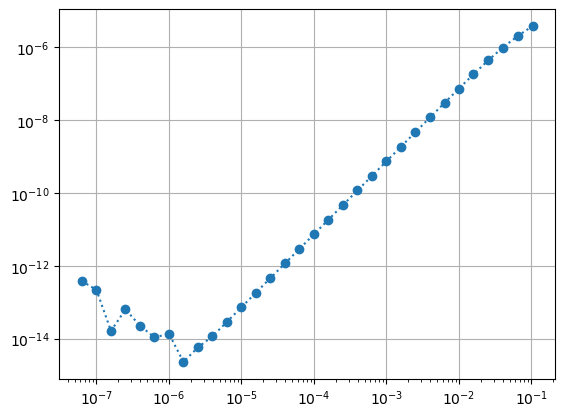

In [14]:
plt.loglog(Test_H, Error_Vec2, ':o')
plt.grid()